**BT : Controlling dynamics of a servomotor**

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=75a6fac4f36812e0799f6739ec54fe2a9f75db24e98e357d9a91d5d565633d3c
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.control.controlsystem import Antecedent
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d
from networkx.algorithms.bipartite import projection

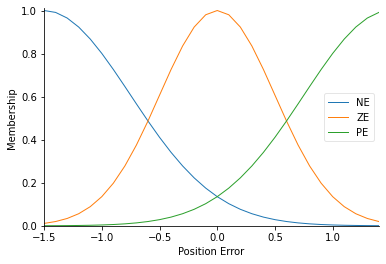

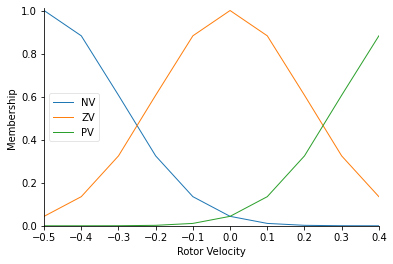

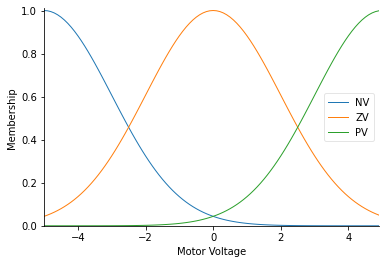

In [60]:
# Input
pos  = ctrl.Antecedent(np.arange(-1.5, 1.5, 0.1), 'Position Error')
vel = ctrl.Antecedent(np.arange(-0.5, 0.5, 0.1), 'Rotor Velocity')
# Output 
volt = ctrl.Consequent(np.arange(-5, 5, 0.1), 'Motor Voltage')

# Membership functions
pos['NE'] = fuzz.gaussmf(np.arange(-1.5, 1.5, 0.1),-1.5,0.75)
pos['ZE'] = fuzz.gaussmf(np.arange(-1.5, 1.5, 0.1),0,0.5)
pos['PE'] = fuzz.gaussmf(np.arange(-1.5, 1.5, 0.1),1.5,0.75)

vel['NV'] = fuzz.gaussmf(np.arange(-0.5, 0.5, 0.1),-0.5,0.2)
vel['ZV'] = fuzz.gaussmf(np.arange(-0.5, 0.5, 0.1),0,0.2)
vel['PV'] = fuzz.gaussmf(np.arange(-0.5, 0.5, 0.1),0.5,0.2)

volt['NV'] = fuzz.gaussmf(np.arange(-5, 5, 0.1),-5,2)
volt['ZV'] = fuzz.gaussmf(np.arange(-5, 5, 0.1),0,2)
volt['PV'] = fuzz.gaussmf(np.arange(-5, 5, 0.1),5,2)

pos.view()
vel.view()
volt.view()

In [33]:
# Rules
rule = []
rule.append(ctrl.Rule(antecedent=(pos['NE'] & vel['NV'])|(pos['NE'] & vel['ZV'])|(pos['NE'] & vel['PV'])|(pos['ZE'] & vel['NV']), consequent=volt['NV'], label='Rule NV'))
rule.append(ctrl.Rule(antecedent=(pos['ZE'] & vel['ZV']), consequent=volt['ZV'], label='Rule ZV'))
rule.append(ctrl.Rule(antecedent=(pos['ZE'] & vel['PV'])|(pos['PE'] & vel['NV'])|(pos['PE'] & vel['ZV'])|(pos['PE'] & vel['PV']), consequent=volt['PV'], label='Rule PV'))

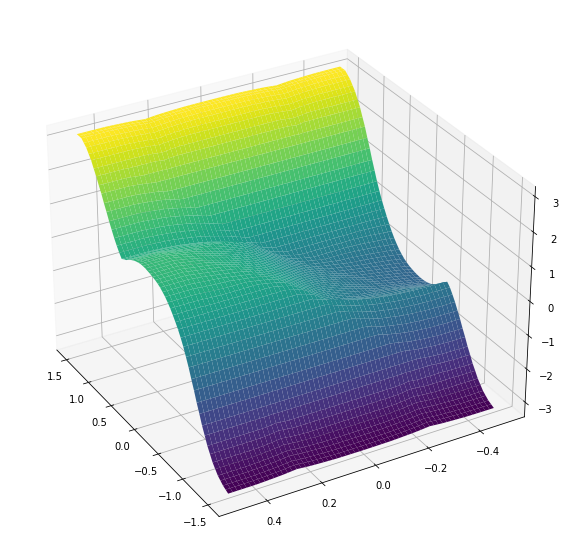

In [50]:
#Control
volt_system = ctrl.ControlSystem(rule)
volt_simulation = ctrl.ControlSystemSimulation(volt_system, flush_after_run = 61*61+1)

upsampled1 = np.linspace(-1.5, 1.5, 61)
upsampled2 = np.linspace(-0.5, 0.5, 61)

x,y = np.meshgrid(upsampled1, upsampled2)
z   = np.zeros_like(x)
for i in range(61) :
  for j in range(61) :
    volt_simulation.input['Position Error'] = x[i,j]
    volt_simulation.input['Rotor Velocity'] = y[i,j]
    volt_simulation.compute()
    z[i,j] = volt_simulation.output['Motor Voltage']

#Xuất đồ thị Motor_Trai
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.5, antialiased = True)
ax.view_init(30,150)